##Import necessary packages and functions

## Simple vanilla network

In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
#loading the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


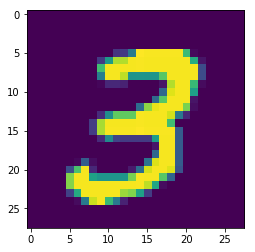

In [0]:
#plotting the sample data
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[7])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

#input shape (28, 28, 1) 
model.add(Convolution2D(8,3,3, activation='relu', input_shape=(28,28,1)))
#output shape (26, 26, 32), Receptive Field (3 X 3)

#input shape (26, 26, 32)
model.add(Convolution2D(32,3,3, activation='relu'))
#output shape (24, 24, 32), Receptive Field (5 X 5)

#input shape (24,24,32)
model.add(Convolution2D(10,1,activation='relu'))
#output shape (24,24,10), Receptive Field (5 X 5)

#input shape (24, 24, 10)
model.add(MaxPooling2D(pool_size=(2,2)))
#output shape (12, 12, 10), Receptive Field (10 X 10)

#input shape (12, 12, 10)
model.add(Convolution2D(16,3,3, activation='relu'))
#output shape (10, 10, 16), Receptive Field (12 X 12)


#input shape (10, 10, 16)
model.add(Convolution2D(10,1,activation='relu'))
#output shape (10,10,10), Receptive Field (12 X 12)

#input shape (10, 10, 10)
model.add(Convolution2D(16,3,3,activation='relu'))
#output shape (8,8,16), Receptive Field (14 X 14)

#input shape (8, 8, 16)
model.add(Convolution2D(16,3,3, activation='relu'))
#output shape (6,6,16), Receptive Field (16 X 16)


model.add(Convolution2D(10,6))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        2336      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 10)        170       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 16)          1456      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 22s 365us/step - loss: 0.2246 - acc: 0.9311
Epoch 2/30
60000/60000 [==============================] - 21s 358us/step - loss: 0.0814 - acc: 0.9750
Epoch 3/30
60000/60000 [==============================] - 22s 359us/step - loss: 0.0583 - acc: 0.9825
Epoch 4/30
60000/60000 [==============================] - 22s 363us/step - loss: 0.0467 - acc: 0.9858
Epoch 5/30
60000/60000 [==============================] - 22s 363us/step - loss: 0.0396 - acc: 0.9880
Epoch 6/30
60000/60000 [==============================] - 22s 364us/step - loss: 0.0330 - acc: 0.9897
Epoch 7/30
60000/60000 [==============================] - 22s 364us/step - loss: 0.0297 - acc: 0.9908
Epoch 8/30
60000/60000 [==============================] - 21s 357us/step - loss: 0.0261 - acc: 0.9917
Epoch 9/30
60000/60000 [==============================] - 22s 362us/step - loss: 0.0242 - acc: 0.9919
Epoch 10/30
60000/60000 [==============================] - 22s 363us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04478499390205707, 0.9905]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.52300746e-17 2.16108363e-17 1.57313615e-12 8.89229845e-09
  5.63099071e-25 1.01049886e-16 1.23593947e-35 1.00000000e+00
  1.47823608e-16 5.66889634e-12]
 [5.10148391e-12 1.81796006e-12 1.00000000e+00 4.99701219e-24
  4.95597711e-21 3.65996100e-27 2.02422457e-19 5.58863824e-26
  1.24646200e-17 7.72810799e-31]
 [3.50161176e-15 1.00000000e+00 4.13139828e-10 2.77021149e-17
  3.72419748e-08 8.81137163e-10 2.57266657e-14 1.45434859e-10
  2.61302735e-09 4.49074024e-12]
 [1.00000000e+00 6.35312232e-21 2.08681906e-16 4.83272621e-19
  4.96484292e-17 4.11483742e-17 1.68834917e-13 2.43020427e-27
  2.67094345e-18 1.13424266e-15]
 [9.61311361e-19 3.39525556e-20 2.04175340e-17 3.71544967e-23
  1.00000000e+00 7.29111808e-21 3.81134121e-17 2.57567338e-20
  6.18573338e-17 6.95025905e-13]
 [1.70946275e-14 1.00000000e+00 1.25802013e-09 4.56027071e-18
  1.61272915e-08 1.00045987e-11 4.25908664e-15 6.42846332e-10
  1.32338973e-09 2.78229467e-10]
 [2.31739377e-36 1.87470262e-19 3.28783912e-16 7.46567597e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

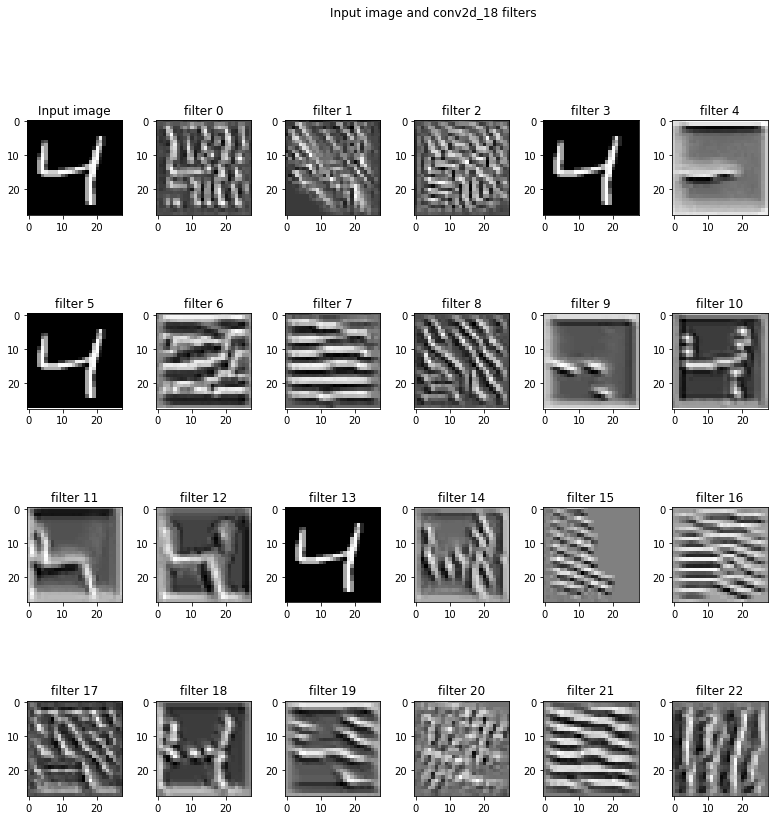

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_18'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()